In [56]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [57]:
# READ THE IMAGE
image_20160725_123734 = cv2.imread('/content/20160725_123734.jpg')
# CONVERT TO GRAY SCALE
image_20160725_123734_gray = cv2.cvtColor(image_20160725_123734, cv2.COLOR_BGR2GRAY)
# PRINT THE IMAGE SHAPE
print("Shape is:", image_20160725_123734_gray.shape)

# READ THE IMAGE
image_20160727_1234153 = cv2.imread('/content/20160727_1234153.jpg')
# CONVERT TO GRAY SCALE
image_20160727_1234153_gray = cv2.cvtColor(image_20160727_1234153, cv2.COLOR_BGR2GRAY)
# PRINT THE IMAGE SHAPE
print("Shape is:", image_20160727_1234153_gray.shape)

# READ THE IMAGE
image_crop_caesar54 = cv2.imread('/content/crop_caesar54.jpg')
# CONVERT TO GRAY SCALE
image_crop_caesar54_gray = cv2.cvtColor(image_crop_caesar54, cv2.COLOR_BGR2GRAY)
# PRINT THE IMAGE SHAPE
print("Shape is:", image_crop_caesar54_gray.shape)

# READ THE IMAGE
image_smaller_salad = cv2.imread('/content/smaller_salad (67).jpg')
# CONVERT TO GRAY SCALE
image_smaller_salad_gray = cv2.cvtColor(image_smaller_salad, cv2.COLOR_BGR2GRAY)
# PRINT THE IMAGE SHAPE
print("Shape is:", image_smaller_salad_gray.shape)

Shape is: (820, 2021)
Shape is: (861, 1939)
Shape is: (343, 410)
Shape is: (528, 396)


In [58]:
# CREATE THE SHARPENING KERNEL MATRIX
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) # np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

In [59]:
sharpen_1 = cv2.filter2D(image_20160725_123734_gray, -1, sharpen_kernel) # -1 --> ddepth: It is the desirable depth of destination image. Value -1 represents that the resulting image will have same depth as the source image.
sharpen_2 = cv2.filter2D(image_20160727_1234153_gray, -1, sharpen_kernel)
sharpen_3 = cv2.filter2D(image_crop_caesar54_gray, -1, sharpen_kernel)
sharpen_4 = cv2.filter2D(image_smaller_salad_gray, -1, sharpen_kernel)

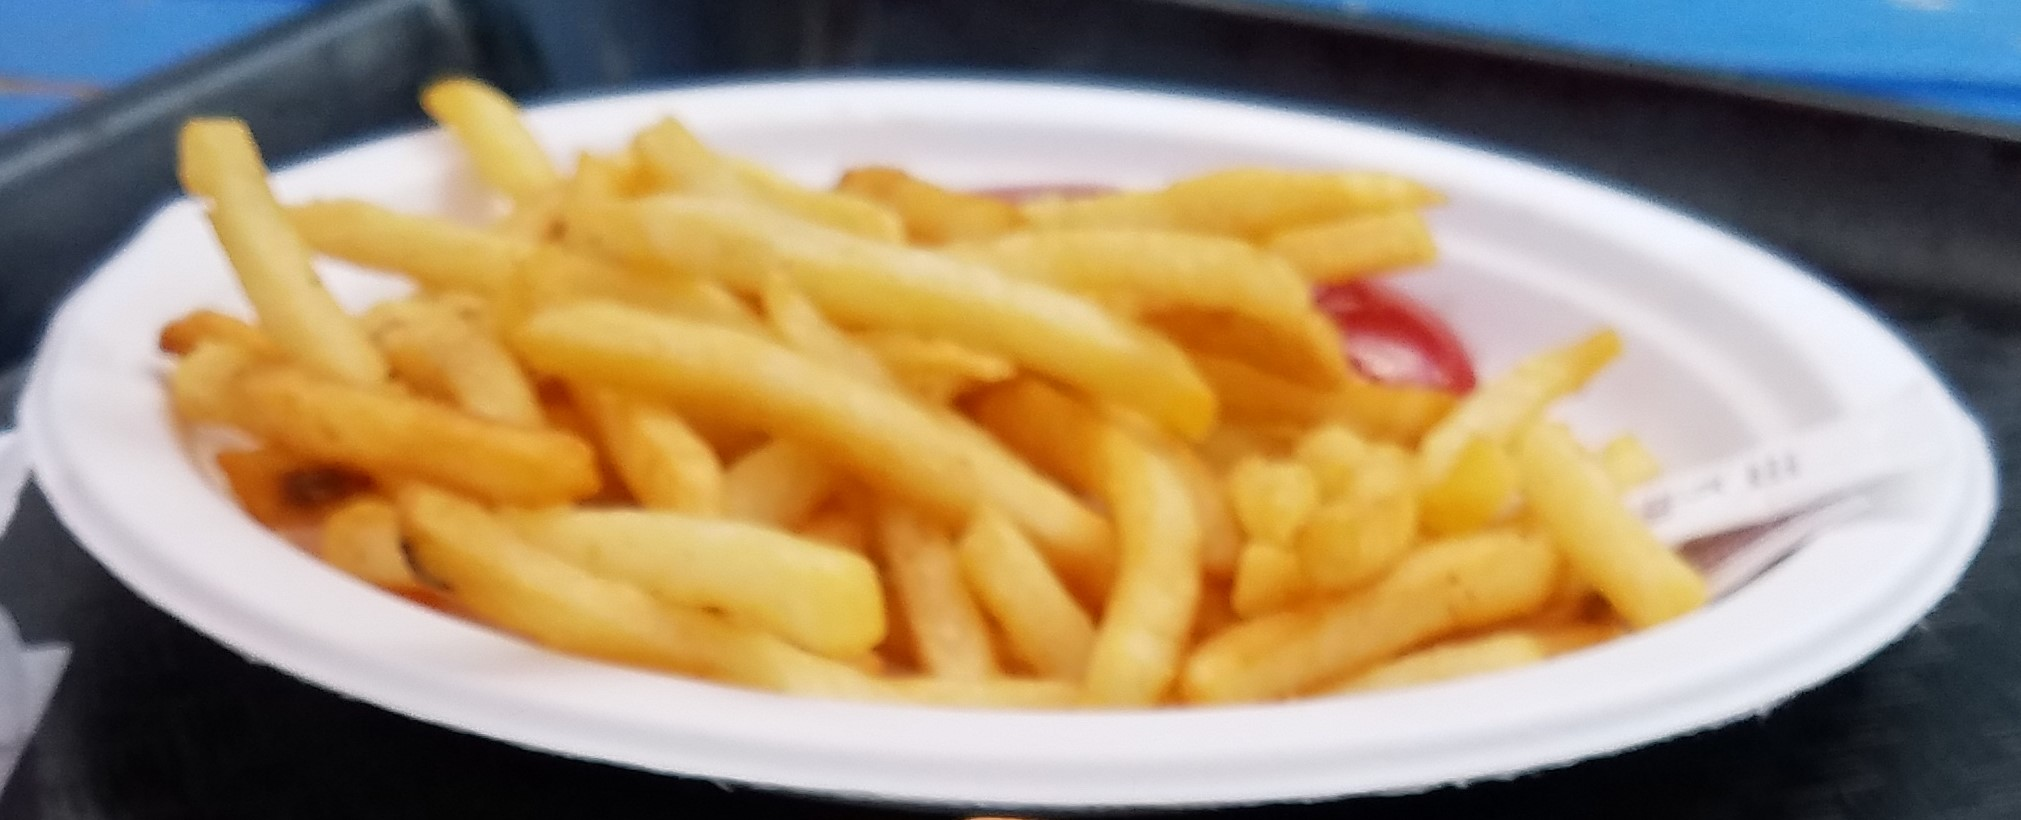

In [60]:
cv2_imshow(image_20160725_123734)

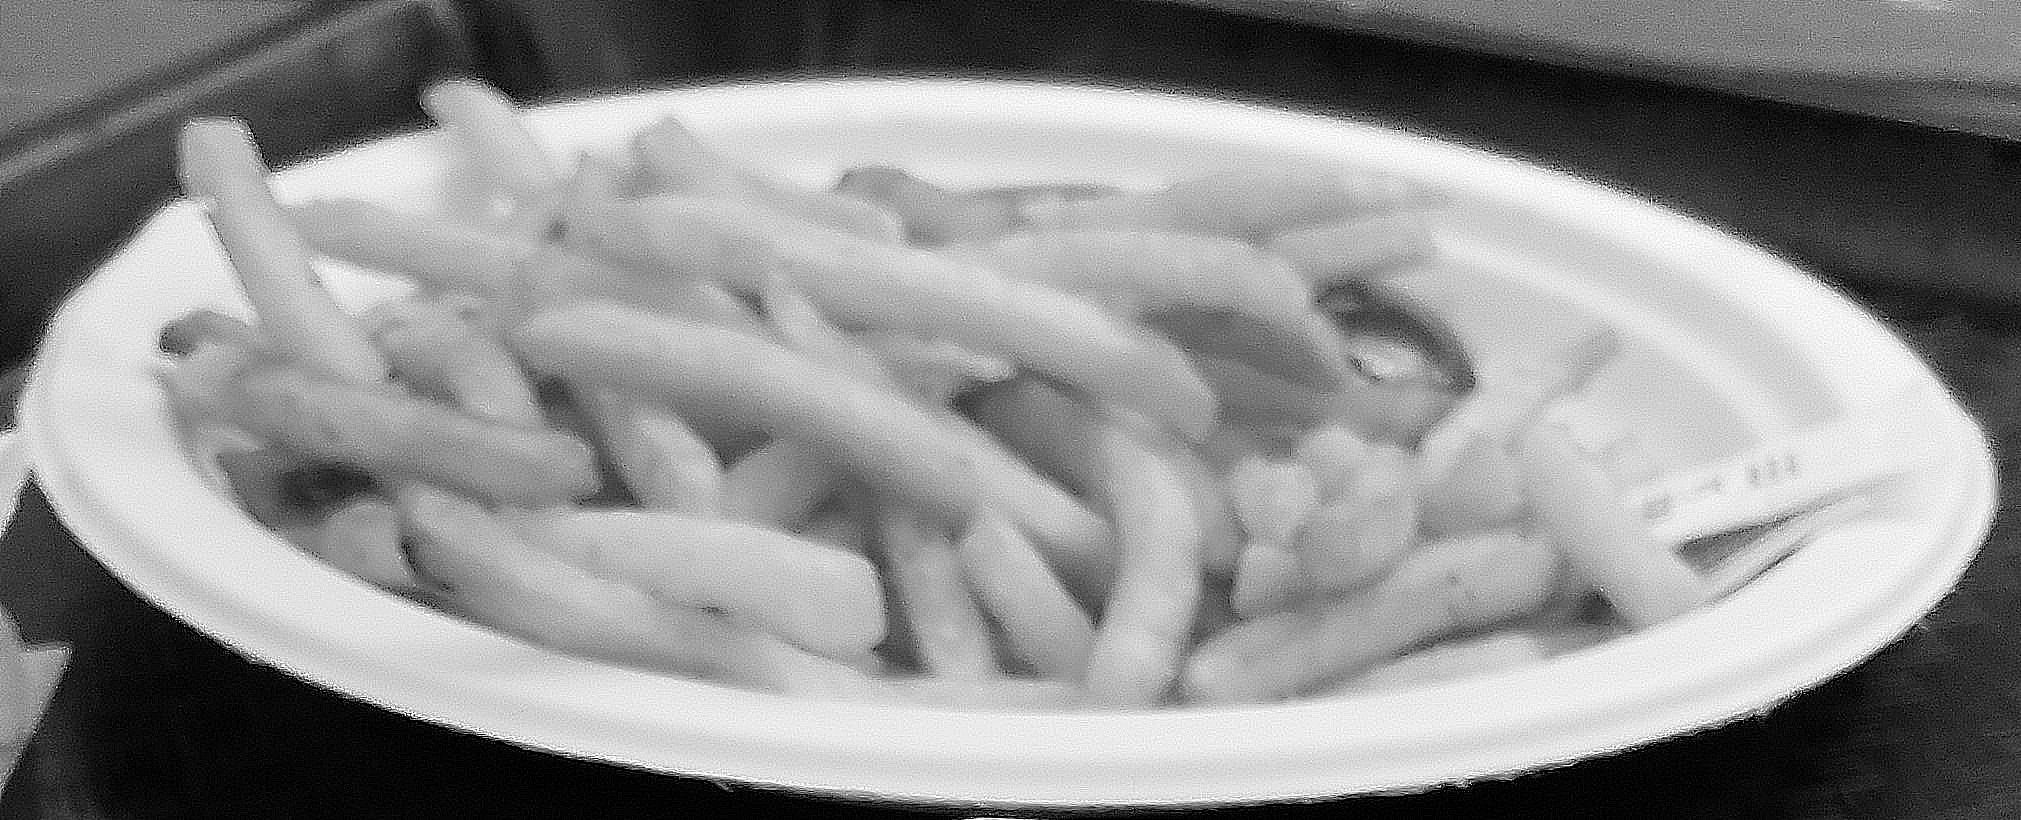

-1

In [61]:
# FIRST IMAGE SHARPENED
cv2_imshow(sharpen_1)
cv2.waitKey()

In [63]:
def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()

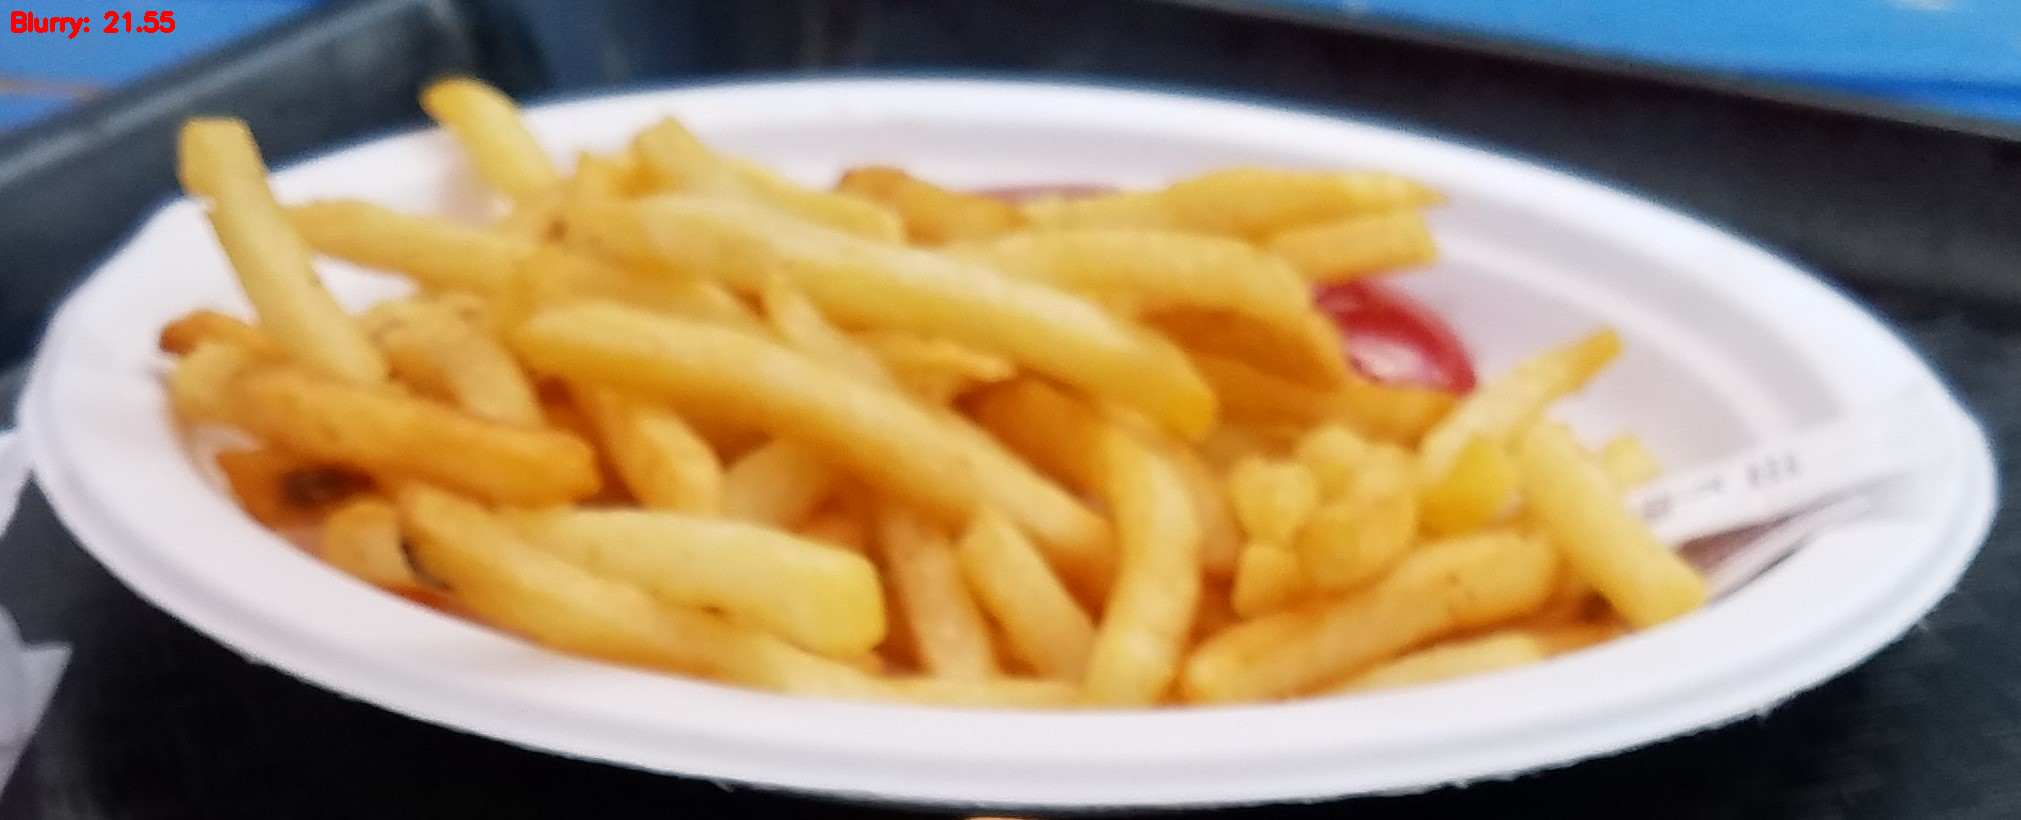

In [66]:
# load the image, convert it to grayscale, and compute the
# focus measure of the image using the Variance of Laplacian
# method
image = cv2.imread("/content/20160725_123734.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
text = "Not Blurry"

# if the focus measure is less than the supplied threshold,
# then the image should be considered "blurry"

if fm < 100:
  text = "Blurry"

# show the image
cv2.putText(image, "{}: {:.2f}".format(text, fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
cv2_imshow(image)
key = cv2.waitKey(0)

In [100]:
img_gray_test = ['/content/20160725_123734.jpg', 
                 '/content/20160727_1234153.jpg', 
                 '/content/crop_caesar54.jpg', 
                 '/content/smaller_salad (67).jpg',
                 '/content/photo-1581326446198-5d21d2368c02.jpeg',
                 '/content/download.jpeg',
                 '/content/picography-blurry-car-lights-on-highway-768x576.jpg',
                 '/content/download (1).jpeg',
                 '/content/3e27307fcac5400dc253a8c3617329cd.jpg']

In [101]:
# load the image, convert it to grayscale, and compute the
# focus measure of the image using the Variance of Laplacian
# method
for el in img_gray_test:
  image = cv2.imread(el)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  fm = variance_of_laplacian(gray)
  # text = "Not Blurry"

  # if the focus measure is less than the supplied threshold,
  # then the image should be considered "blurry"

  # if fm +/- 5 compare to 50 than the picture is blurry
  if ((fm + 5) < 50 and (fm - 3) < 50):
    print("BLURRY", fm)
    # text = "Blurry"
  else:
    print("NOT BLURRY", fm)

# # show the image
# cv2.putText(image, "{}: {:.2f}".format(text, fm), (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
# cv2_imshow(image)
# key = cv2.waitKey(0)

BLURRY 21.54936427858861
BLURRY 19.175862677838172
NOT BLURRY 53.30581555949537
NOT BLURRY 45.81866427546428
BLURRY 30.385049922612527
NOT BLURRY 920.410171092664
BLURRY 8.093344578276733
BLURRY 10.228271798426823
NOT BLURRY 250.79384901295515


# References

- https://pyimagesearch.com/2015/09/07/blur-detection-with-opencv/